# Distributed Information Systems

***Final Exam, Fall Semester, 2021***

The exam will be held on your computer, but digital communication with other persons by any means is **strictly prohibited**.
The following materials are also allowed: exercise sheets and solutions, past exams with your own solution, personally written notes and personally collected documentation. You may also use Stackoverflow and Python documentation for questions related to Python programming.
By participating in this exam you **agree to these conditions**.

These are the instructions for the exam:

- You are not allowed to leave the examination room in the first 20 and the last 15 minutes of the exam.
- The quiz will remain open **only for the first 2 hours** of the exam to avoid network congestion.
- **30 minutes** before the end of the exam we will announce a password to upload your jupyter notebook on **Moodle**.
- It is not recommended to leave the exam before the password is published. If you need to leave earlier, contact us.
- **You must follow the EPFL guidelines and wear your mask when you enter, leave, and move around the exam room.**
- **You have to wear the bracelet for COVID certification at all times.**
- **We would also like to kindly ask you to wear your mask when you ask questions and when we check your camipro card.**

## 0 Rename your Notebook
Replace SciperNo with your **personal SCIPER Number**.

## 1 [Multiple Choice Questions]()
**Password**:

## 2 Link-Based Ranking

*(5 sub-questions)*

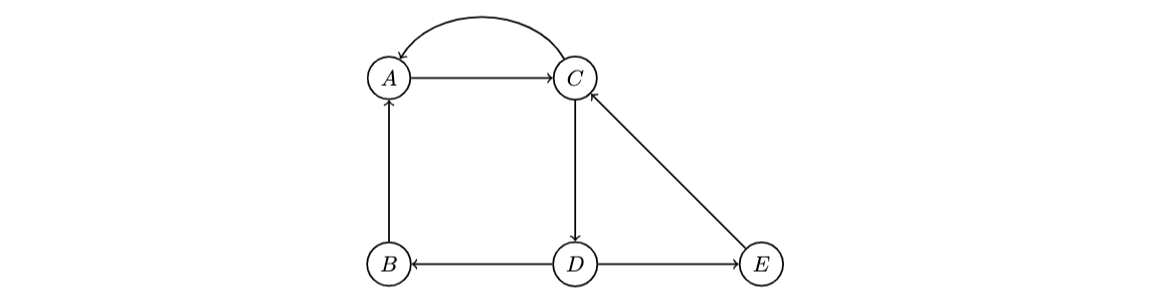

Answer the questions regarding the graph above. You can do the computations either by hand or by using computer.

> **1. You are going to run Pagerank on this graph. What is the link matrix? What does it become after normalizing by the node degrees? (Please explicitly state what do the rows and the columns indicate.)**

> **2. Run Pagerank without teleporting for two iterations. What are the final pagerank scores and the ranking? Show your work. You can assume all pages initially have a pagerank score of 1. Hint: Do not forget to normalize pagerank scores so that they will add up to 1 after each iteration.**

> **3. Suppose that the edge (E, C) did not exist. What would be the final ranking?** 

> **4. Run Personalized Pagerank with teleporting probability of 1/5. Random jumps are always to node A. Iterate only once. What are the final scores and the ranking?**

> **5. Imagine a new node is connected to the network by a single edge directed to A. How this would affect the result of 2 and 4?**

## 3 News recommendation

You will create news recommendations for the small news portal aggregator, "*allabouthealthcare.com*", regarding news about healthcare. In this website users can read various news articles regarding healthcare collected from popular healthcare media. 

The developers of the website collect analytics regarding which user has read what article. You are hired to create a recommendation engine that will provide news recommendations to users.

You will first explore the dataset by providing dataset descriptive statistics, and then you will implement various methods for news recommendation.

#### DATASET
You are given two files regarding the news articles consumption of this news portal. 

> 1. **News articles** (*news_articles.txt*): 
>
> This dataset contains information about the news articles collected by the portal.
> The information stored for each article is the following:
>
> - **article id**: The id of the article.
> - **title**: The title of the article.
- **medium**: The news portal the the article was originally published.
- **publish date**: The date of publication of the article.
- **authors**: The names and surnames of authors seperated with comma.
- **corpus**: The main text of the article without any identation.
- **url**: The url of the article.

> 2. **User log** (*user_log.txt*)
>
> This dataset contains the user log of *allabouthealthcare.com*. 
> The information stored for each row is the following:
>
> - **user id**: The id of the user.
- **article id**: The id of the article the user read.


### 3.1 Understanding the dataset
*(5 sub-questions)*

You need to compute the following descriptive statistics for the aforementioned dataset.

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# read the dataset
articles = pd.read_csv('data/news_articles.txt', sep='|').fillna('')
log = pd.read_csv('data/user_log.txt', sep='|')

In [ ]:
articles.head()

In [ ]:
log.head()

> **3.1.1. Compute the top 20 word occurencies from the corpora of all the articles (provide the result sorted)**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

> **3.1.2. Compute the top 3 most published media (provide the result sorted)**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

> **3.1.3. Compute the percentage of articles that are writen by only one author**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

> **3.1.4. Compute the top 3 most active users**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

> **3.1.5. Compute the top 5 most read news articles**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

### 3.2 Item-based collaborative filtering
*(3 sub-questions)*

Now that we have prepared the data, our next mission is to create a recommender system following the paradigm of Item-based Collaborative Filtering. In this case, this is translated into "Users who read this news article also read …".


In order to make predictions, we will apply the following formula, where 
$N_I(a)$ is the set of neighbors of article $a_1$, and $a_2$ is an article viewed by user $x$.


\begin{equation}
{r}_{x}(a_1) =  \frac{\sum\limits_{a_2 \in N_{I}(a_1)} sim(a_1, a_2) r_{x}(a_2)}{\sum\limits_{a_2 \in N_{I}(a_1)}|sim(a_1, a_2)|}
\end{equation}


> **3.2.1 Compute the user-article matrix which should be a 2D numpy array, with each row corresponding to a user and each column to an article. The value of its cell indicates whether the user has read the corresponding article.**

In [ ]:
n_users = len(log['user_id'].unique())
n_items= len(articles)

user_article = np.zeros((n_users, n_items))

# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# add 1 in data_matrix for each article a user has read

# ---------------------------------------------------

user_article

> **3.2.2 Compute the similarity matrix using cosine similarity metric**

In [ ]:
# magnitude = sqrt(x2 + y2 + z2 + ...)
user_article_df = pd.DataFrame(user_article)
magnitude = np.sqrt(np.square(user_article_df).sum(axis=1))

# unitvector = (x / magnitude, y / magnitude, z / magnitude, ...)
user_article_df = user_article_df.divide(magnitude, axis='index')
user_article_df

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(data_items):
    """
    Calculate the column-wise cosine similarity for a sparse
    matrix.
    Return a new dataframe matrix with similarities.
    """
    # PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

    # ---------------------------------------------------

# Build the similarity matrix
similarity_matrix = calculate_similarity(user_article_df)

# Lets get the top 5 similar articles for article with id 4
similarity_matrix.iloc[4].nlargest(5)

> **3.2.3 Predict the top 5 recommendations for the user with id 4 using item-based collaborative filtering**

In [ ]:
user_id = 4 # The id of the user for whom we want to generate recommendations

# Get the articles the user has read.
user_articles = list(log[log['user_id']==user_id]['article_id'].unique())

# User article log
user_article_log_vector = user_article_df.iloc[user_id]

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Calculate the score.
score = ...
# ---------------------------------------------------

In [ ]:
# Print the known likes and the top 5 recommendations.
score.nlargest(5)

### 3.3 Content-based recommendations
*(6 sub-questions)*

The next mission we have is to create a recommender system following the paradigm of the Content-based recommendation approach. In this case, we will also exploit information related to the content of the articles.

As a first step, we will compute the tf-idf weights of the articles.

\begin{equation}
w(t, a) = tf(t, a) \cdot idf(t) = \frac{freq(t, a)}{\max_{s\in T} freq(s, a)} \cdot log(\frac{N}{n(t)})
\end{equation}

Then in order to do predictions, we need to estimate the probability of article $a$ not yet seen by user $x$. To do so, we find the nearest neighbours of $a$ in the subset of articles that have been already seen by the user $x$.

\begin{equation}
r_x(a_1) = \frac{\sum_{a_2\in N_I(a_1)} sim(a_1, a_2) \cdot r_x(a_2)}{\sum_{a_2\in N_I(a_1)} |sim(a_1, a_2)|}
\end{equation}


Find the articles with the most Knn's that are present in the history of the user, aka find the articles that are most similar to the articles that the user has already seen.
- for articles not read by user
- get recommendations
- rank the articles based on the amount of articles present in the "already seen" list of the user


> **3.3.1 Compute tf-idf values for the main corpus of the articles and print the shape of the final matrix**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

tf_idf_matrix = ...
# ---------------------------------------------------
tf_idf_matrix.shape

> **3.3.2 Create the vocabulary of all the articles (as a list) and print the 5 most common words**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
vocabulary = ...
# ---------------------------------------------------

> **3.3.3 Find the term with highest TF-IDF value for the article with id 4.**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

> **3.3.4 Create a function that finds the best 5 recommendations for any given article and print the best 5 recommendations for article with id 4**

In [ ]:
def get_recommendations(i, similarities, k=5):
    """
    Recommends articles based on a similarity dataframe
    Parameters
    ----------
    i : int
        Article index of the similarity dataframe
    similarities : pd.DataFrame
        Similarity dataframe, symmetric, with articles as indices and columns
    k : int
        Amount of recommendations to return
    Returns
    -------
    pd.DataFrame with the top k recommendations
    """
    # PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

    # ---------------------------------------------------

# create similarity
cosine_sim = cosine_similarity(tf_idf_matrix)

# get recommendations for article with id 4
corpus_id_4 = articles[articles['article_id']==4]['corpus'].values[0]
get_recommendations(4, pd.DataFrame(cosine_sim))

> **3.3.5 Find the articles that user with id 4 has NOT yet read and print the count of them**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
article_to_recommend = ...
# ---------------------------------------------------
len(article_to_recommend)

> **3.3.6 Predict top 5 recommendations for user with id 4**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE

# ---------------------------------------------------

### 3.4 Association rules
*(3 sub-questions)*

Now we would like to identify frequent rules that govern how words appear together in the news article **titles**.

We provide every observed pair of words containing "covid" (we only consider rules of size 2).
You need to provide every observed pair of words containing "covid" (we only consider rules of size 2).


* Compute **support** and **confidence** for the rules X -> covid, where X is a word appearing with covid in the given set of pairs.
* From the confidence of the rules you obtained, compute **lift**.
* Show the 5 rules with **highest confidence** and the 5 rules with **highest lift** with the provided code. 

In [ ]:
titles = articles['title'].apply(lambda x: x.lower().split(' '))

> **3.4.1 Compute support and confidence for the rules X -> covid, where X is a word appearing with covid in an article.**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
support    = dict()
confidence = dict()
# ---------------------------------------------------

> **3.4.2 From the confidence of the rules you obtained, compute lift.**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
lift = dict()
# ---------------------------------------------------

> **3.4.3 Show the 5 rules with highest confidence and the 5 rules with highest lift with the provided code.**

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Print confidence
{k: v for k, v in sorted(confidence.items(), key=lambda item: item[1], reverse=True)[:5]}

In [ ]:
# PLEASE ADD YOUR CODE SOLUTION AND RUN THE CELL HERE
# Print lift
{k: v for k, v in sorted(lift.items(), key=lambda item: item[1], reverse=True)[:5]}

## 4 [Submit your notebook]()